In [192]:
import pandas as pd

realestate_df = pd.read_csv('world_real_estate_clean_data_cleaned.csv')

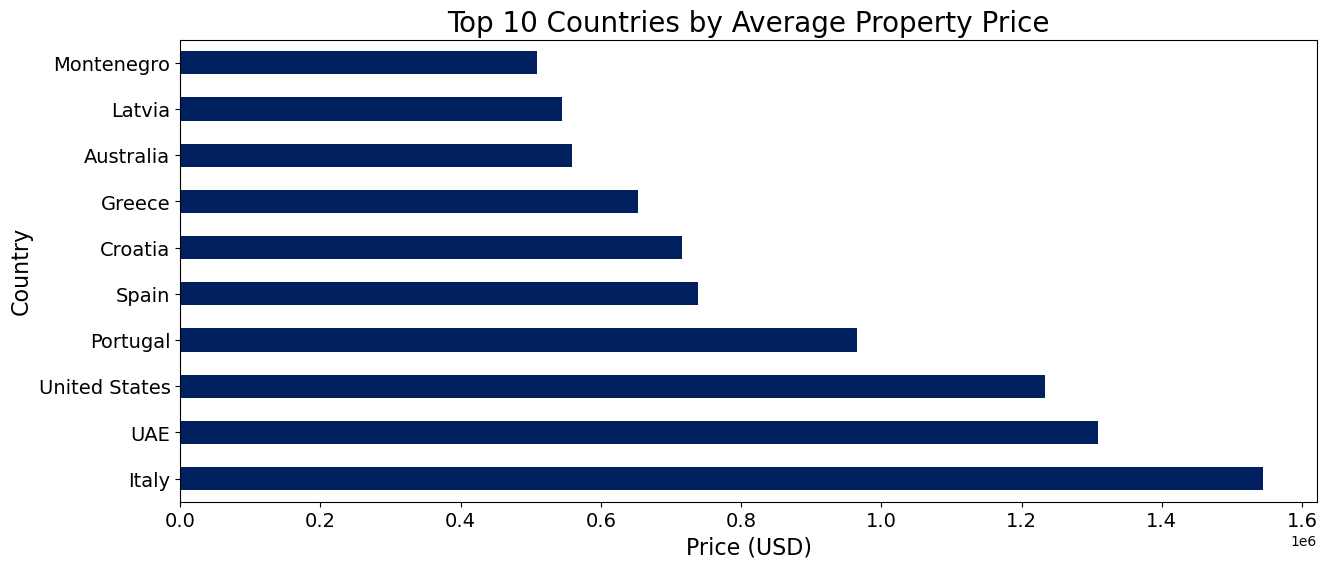

In [191]:
# Calculate average price by country
avg_price_country = (
    realestate_df.groupby('country')['price_in_USD']
    .mean()
    .round(0)
    .sort_values(ascending=False)
)

# Create the plot and capture the Axes object
ax = avg_price_country.head(10).plot(
    kind='barh',
    figsize=(14.67, 6),
    ylabel='Country',
    xlabel='Price (USD)',
    color='#002060'
)

# Customize fonts
ax.set_title('Top 10 Countries by Average Property Price', fontsize=20)
ax.set_xlabel('Price (USD)', fontsize=16)
ax.set_ylabel('Country', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

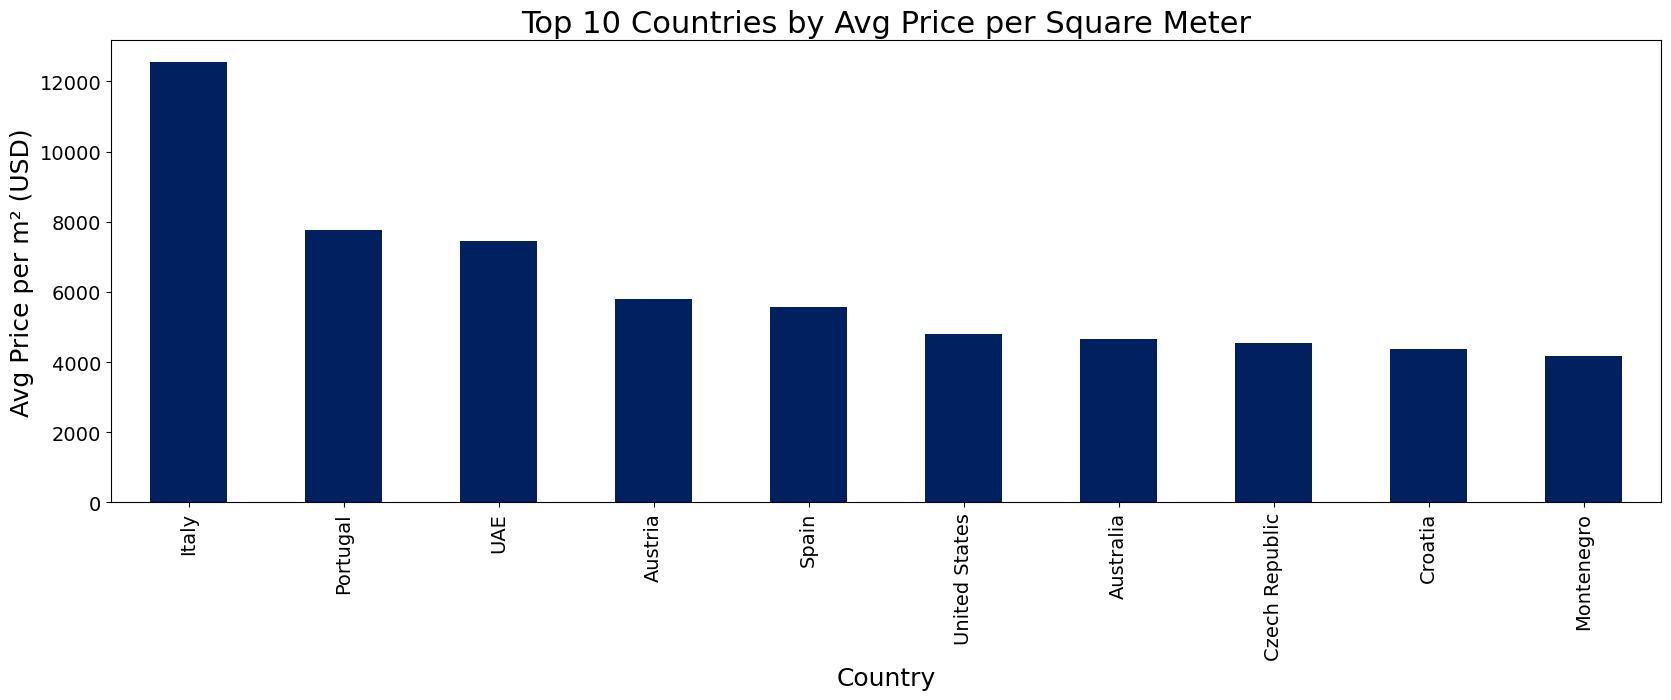

In [190]:
# Calculate price per square meter
realestate_df['price_per_m2'] = realestate_df['price_in_USD'] / realestate_df['apartment_total_area']

# Group and sort
avg_price_per_m2 = (
    realestate_df.groupby('country')['price_per_m2']
    .mean()
    .round(0)
    .sort_values(ascending=False)
)

# Create the plot and capture the Axes object
ax = avg_price_per_m2.head(10).plot(
    kind='bar',
    xlabel='Country',
    ylabel='Avg Price per m²',
    figsize=(20, 6),
    color='#002060'
)

# Customize fonts
ax.set_title('Top 10 Countries by Avg Price per Square Meter', fontsize=22)
ax.set_xlabel('Country', fontsize=18)
ax.set_ylabel('Avg Price per m² (USD)', fontsize=18)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

<Axes: xlabel='Country', ylabel='Price'>

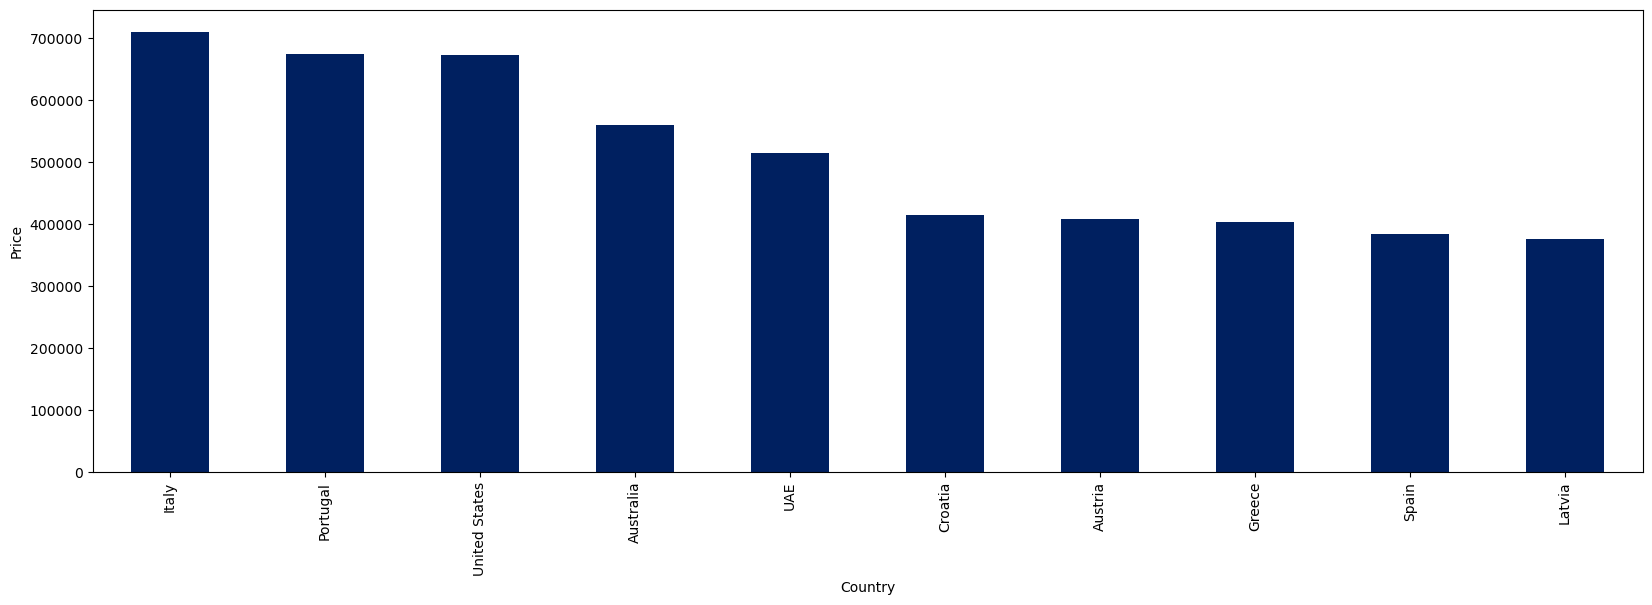

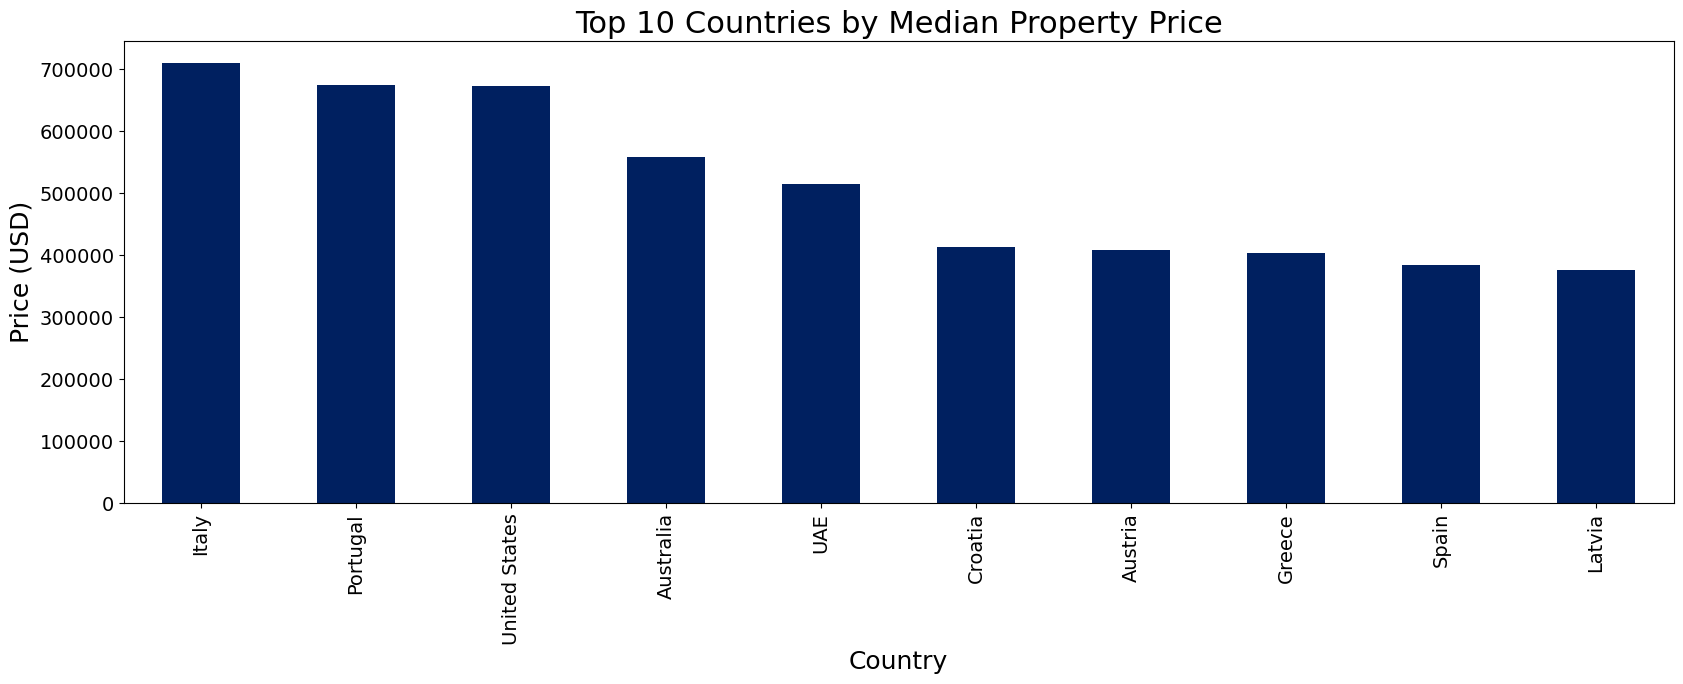

In [189]:
# Calculate median price
median_price_country = (
    realestate_df.groupby('country')['price_in_USD']
    .median()
    .round(0)
    .sort_values(ascending=False)
)

# Create the plot and capture the Axes object
ax = median_price_country.head(10).plot(
    kind='bar',
    xlabel='Country',
    ylabel='Price',
    figsize=(20, 6),
    color='#002060'
)

# Customize fonts
ax.set_title('Top 10 Countries by Median Property Price', fontsize=22)
ax.set_xlabel('Country', fontsize=18)
ax.set_ylabel('Price (USD)', fontsize=18)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

<Axes: xlabel='Percentage of properties above 1M', ylabel='Country'>

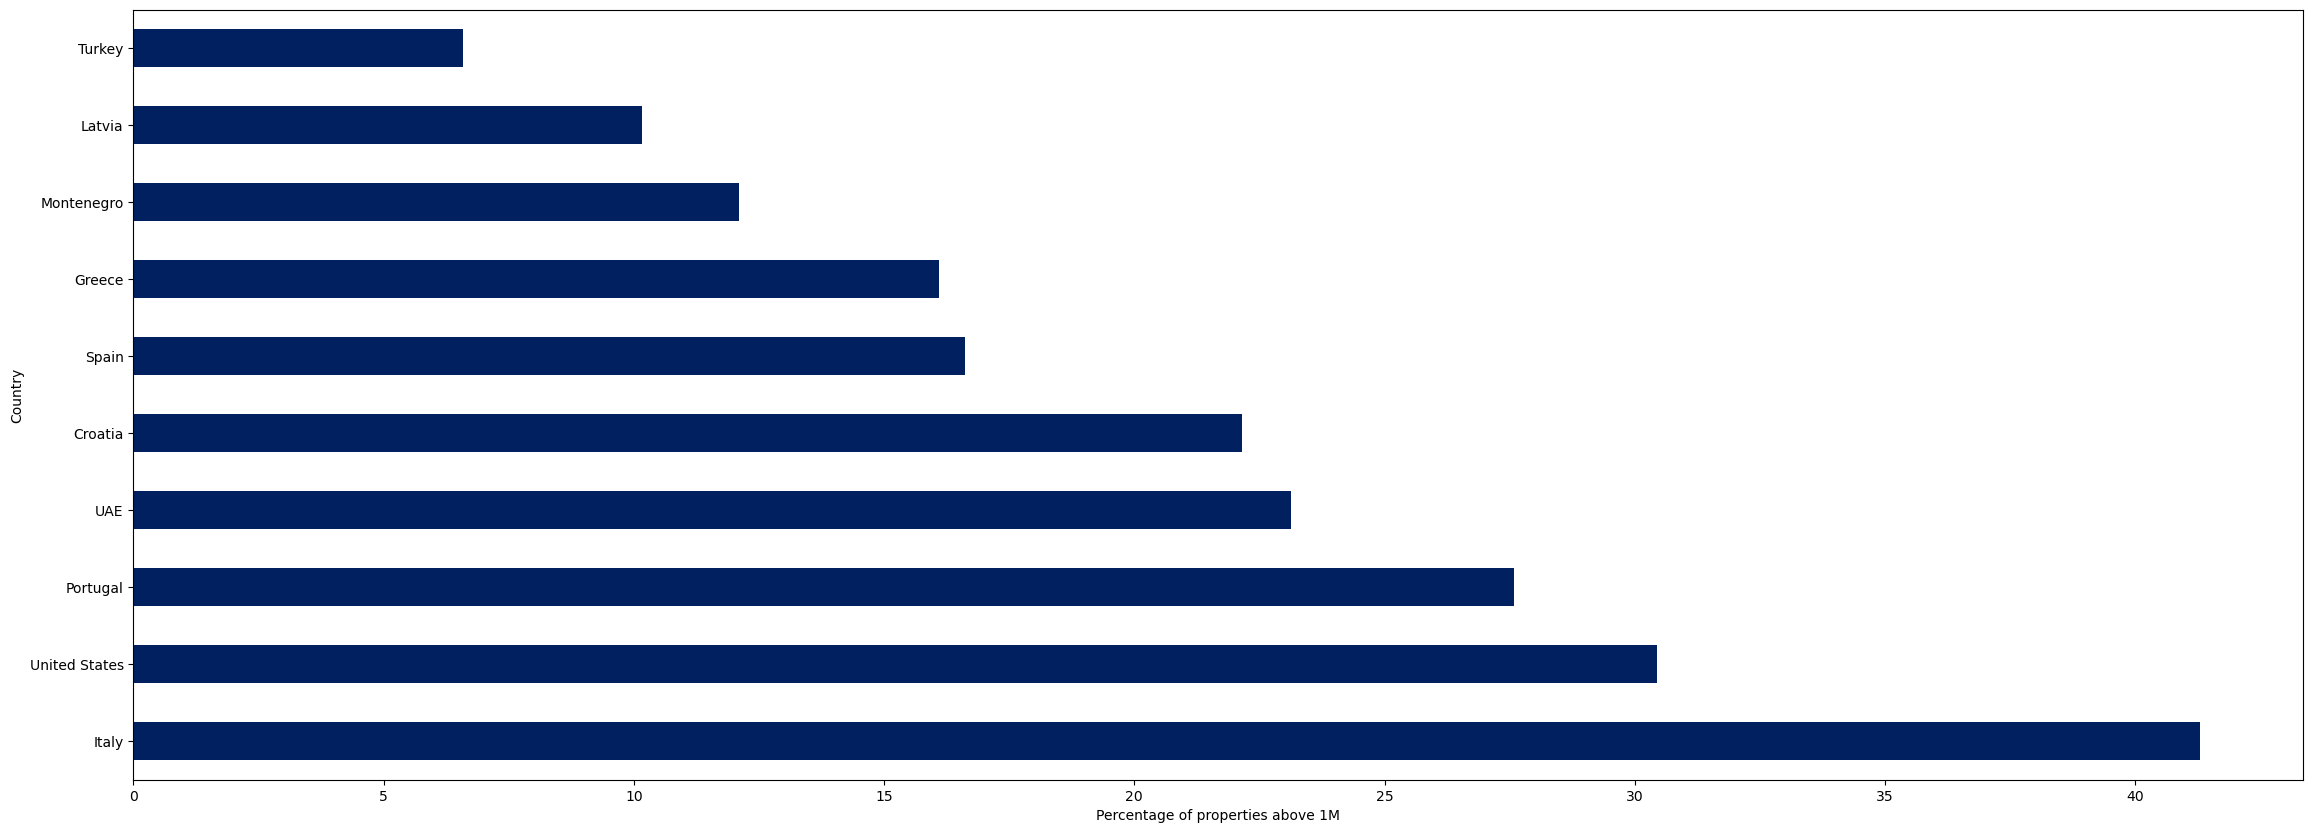

In [173]:
#Proportion of properties above $1M in each country
million_ratio = (
    realestate_df.assign(is_million=realestate_df['price_in_USD'] > 1_000_000)
    .groupby('country')['is_million']
    .mean()
    .sort_values(ascending=False) * 100
)

million_ratio.head(10).plot(kind='barh', xlabel ='Percentage of properties above 1M', ylabel = 'Country', figsize=(28,10), color='#002060')

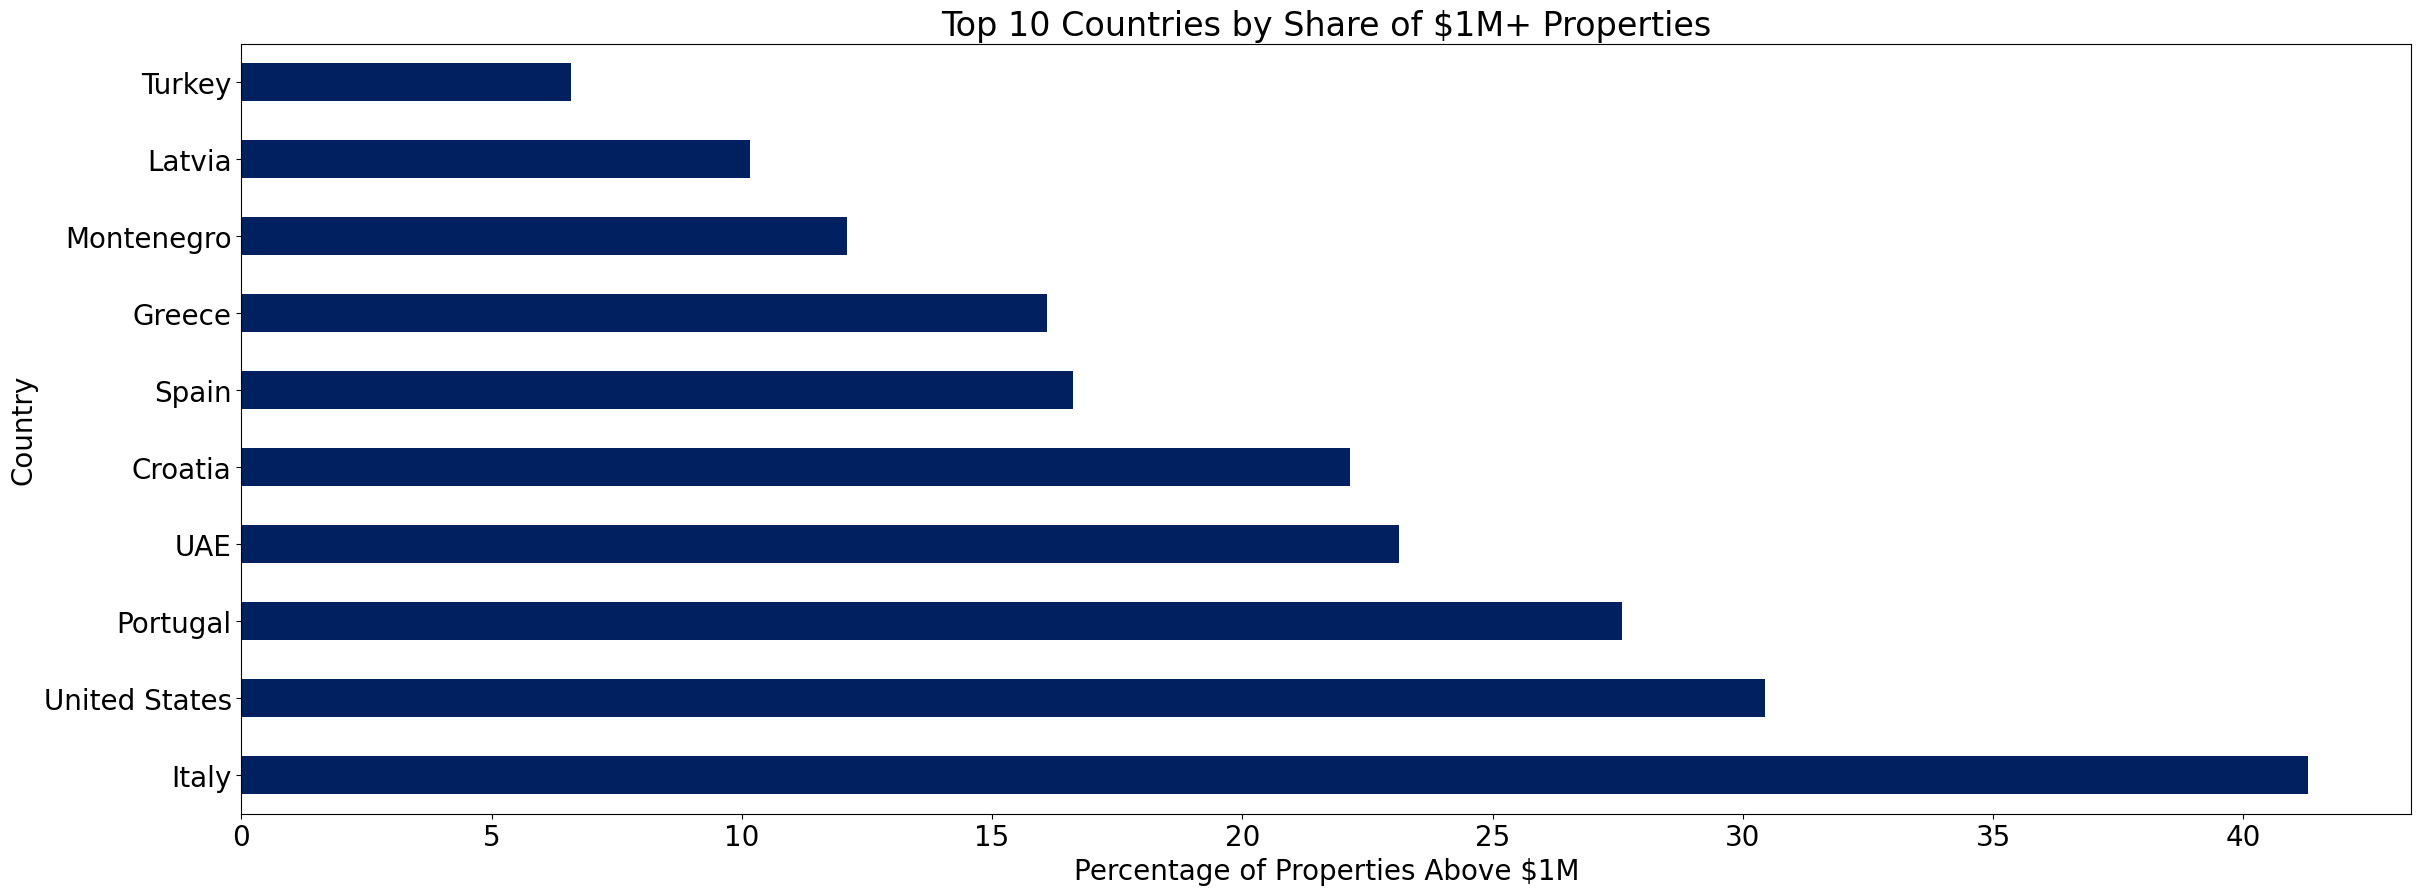

In [188]:
# Calculate proportion
million_ratio = (
    realestate_df.assign(is_million=realestate_df['price_in_USD'] > 1_000_000)
    .groupby('country')['is_million']
    .mean()
    .sort_values(ascending=False) * 100
)

# Create the plot and capture the Axes object
ax = million_ratio.head(10).plot(
    kind='barh',
    xlabel='Percentage of properties above 1M',
    ylabel='Country',
    figsize=(28, 10),
    color='#002060'
)

# Customize fonts
ax.set_title('Top 10 Countries by Share of $1M+ Properties', fontsize=24)
ax.set_xlabel('Percentage of Properties Above $1M', fontsize=20)
ax.set_ylabel('Country', fontsize=20)
ax.tick_params(axis='both', labelsize=20)

<Axes: ylabel='count'>

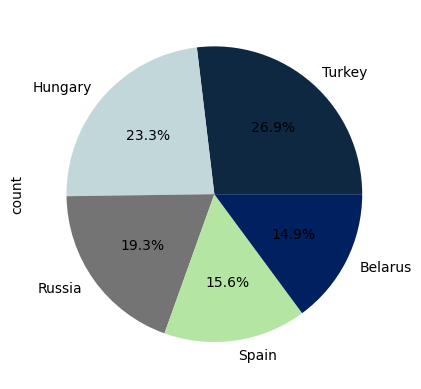

In [140]:
#Countries with Most Listings
realestate_df['country'].value_counts().head(5).plot(
    kind='pie', autopct='%1.1f%%', colors=['#0E2841', '#C1D7DA', '#747474', '#B4E5A2', '#002060']
)

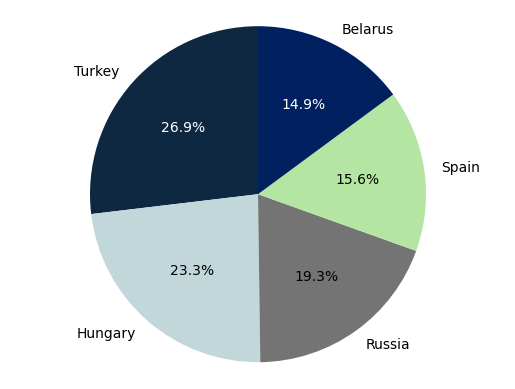

In [156]:
import matplotlib.pyplot as plt

# Get the top 5 countries
top_countries = realestate_df['country'].value_counts().head(5)

# Define colors
colors = ['#0E2841', '#C1D7DA', '#747474', '#B4E5A2', '#002060']

# Create pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    top_countries,
    labels=top_countries.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)

# Set text color based on background color
for i, autotext in enumerate(autotexts):
    if colors[i] in ['#0E2841', '#002060']:
        autotext.set_color('white')  # Dark background - white text
    else:
        autotext.set_color('black')  # Light background - black text

plt.axis('equal')  
plt.show()

<Axes: xlabel='apartment_total_area', ylabel='price_in_USD'>

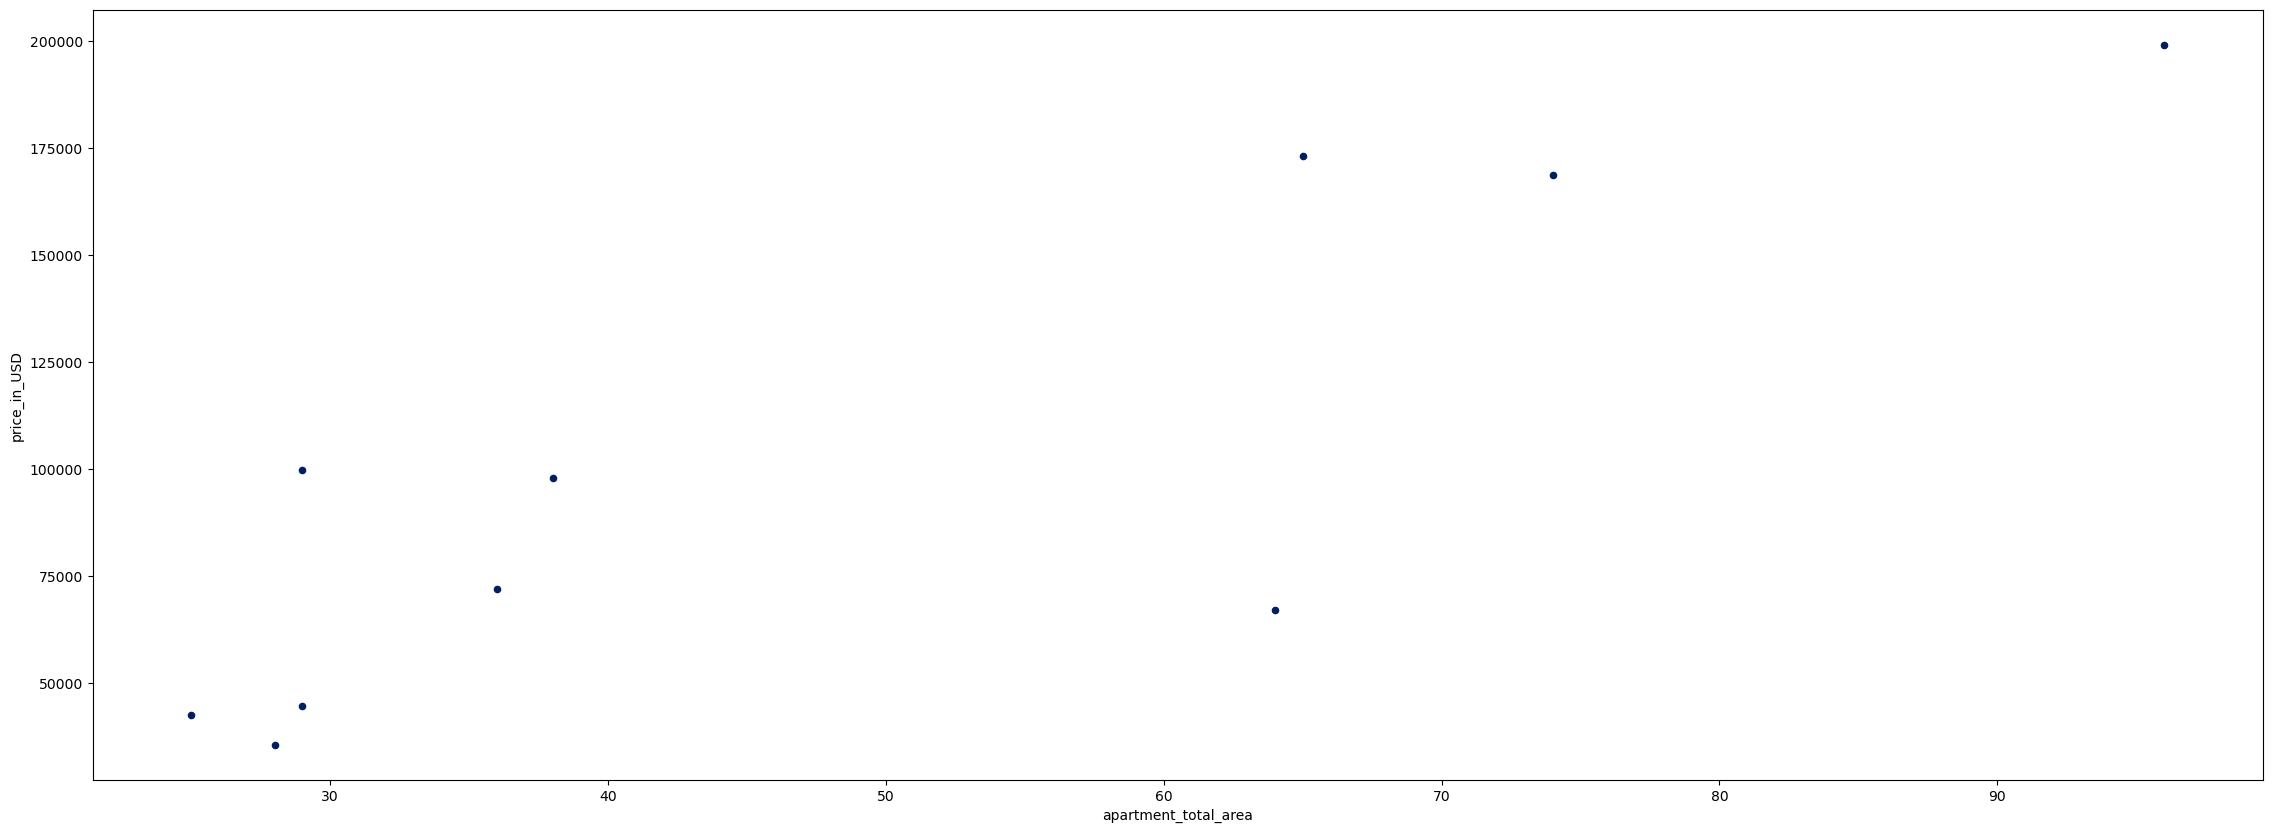

In [174]:
#Largest Properties Under $200k
largest_under_200k = realestate_df[realestate_df['price_in_USD'] < 200_000]
largest_under_200k.head(10).plot(
    kind='scatter',
    x='apartment_total_area',
    y='price_in_USD',
    figsize=(28,10),
    color='#002060',
)

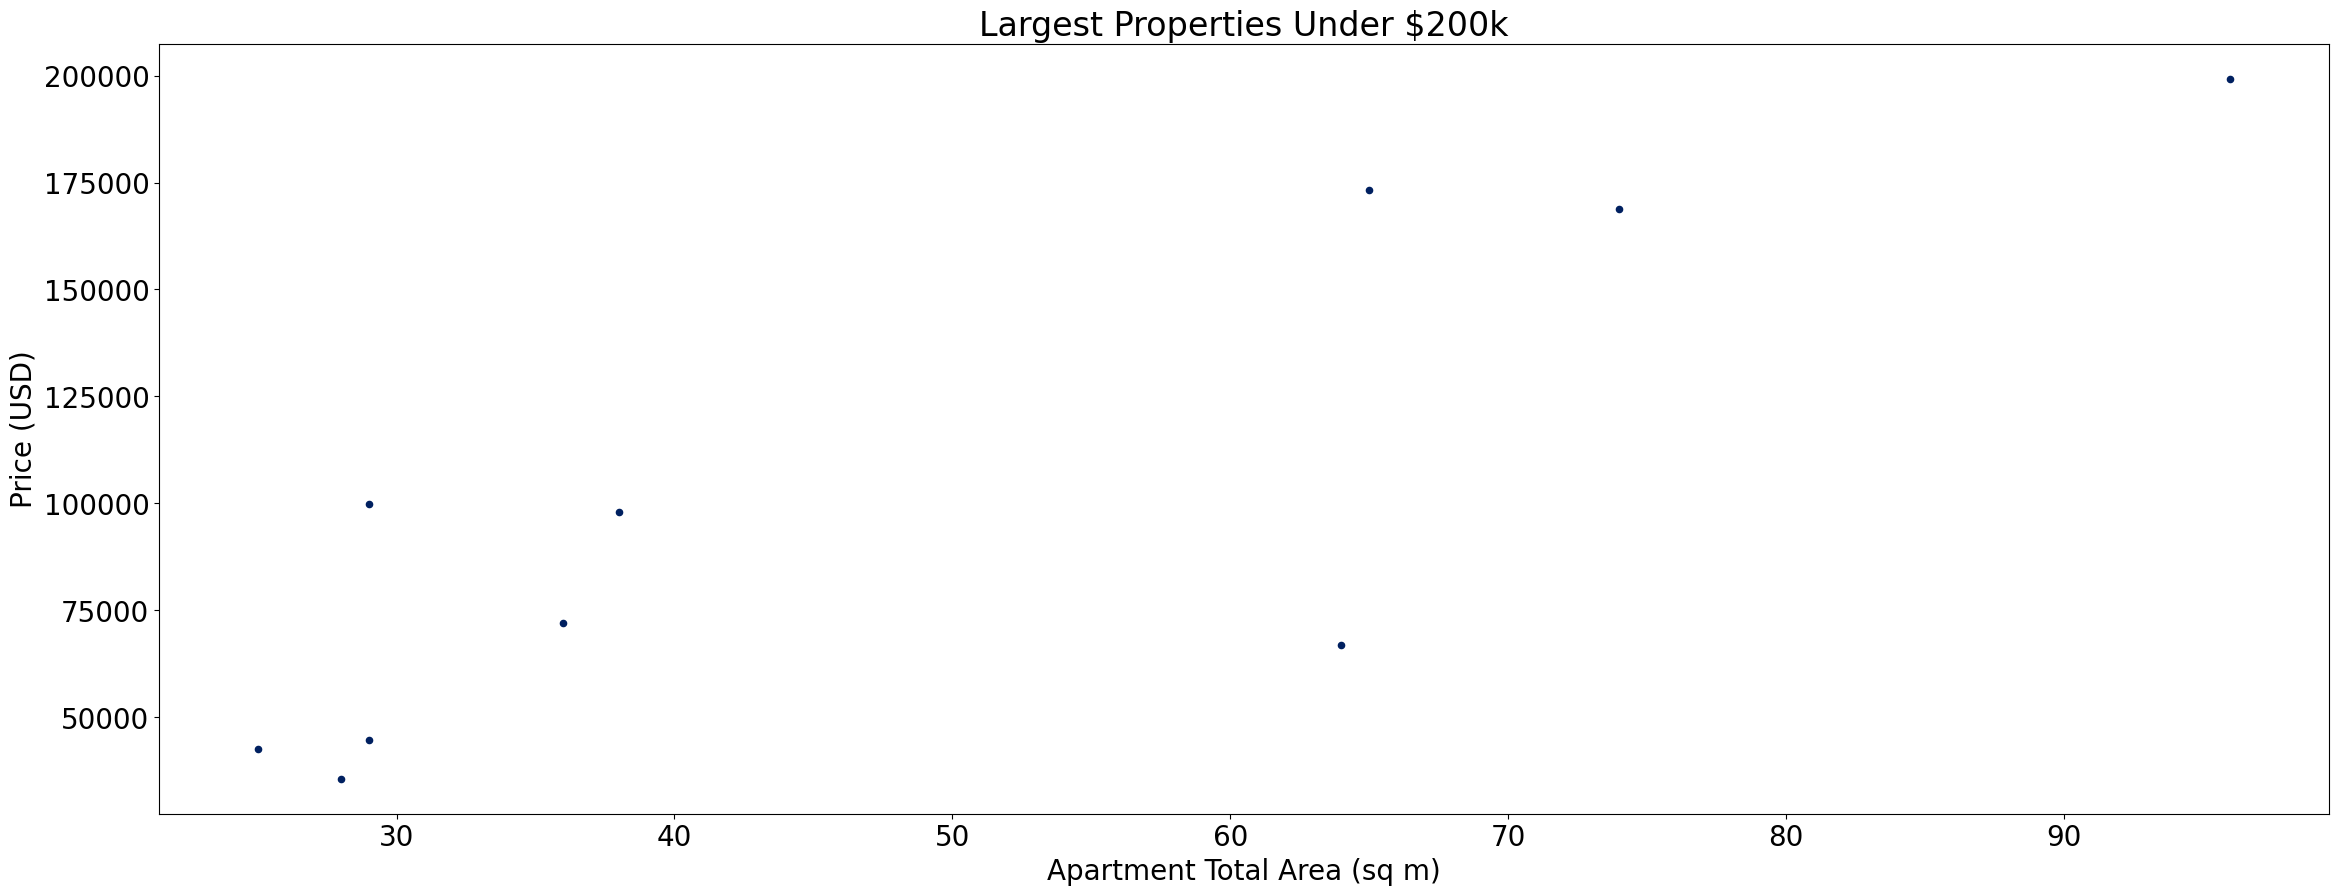

In [186]:
# Filter and plot
largest_under_200k = realestate_df[realestate_df['price_in_USD'] < 200_000]

# Create the plot and capture the Axes object
ax = largest_under_200k.head(10).plot(
    kind='scatter',
    x='apartment_total_area',
    y='price_in_USD',
    figsize=(28, 10),
    color='#002060'
)

# Customize fonts
ax.set_title('Largest Properties Under $200k', fontsize=24)
ax.set_xlabel('Apartment Total Area (sq m)', fontsize=20)
ax.set_ylabel('Price (USD)', fontsize=20)
ax.tick_params(axis='both', labelsize=20)

<Axes: xlabel='Country', ylabel='Num of New Builds'>

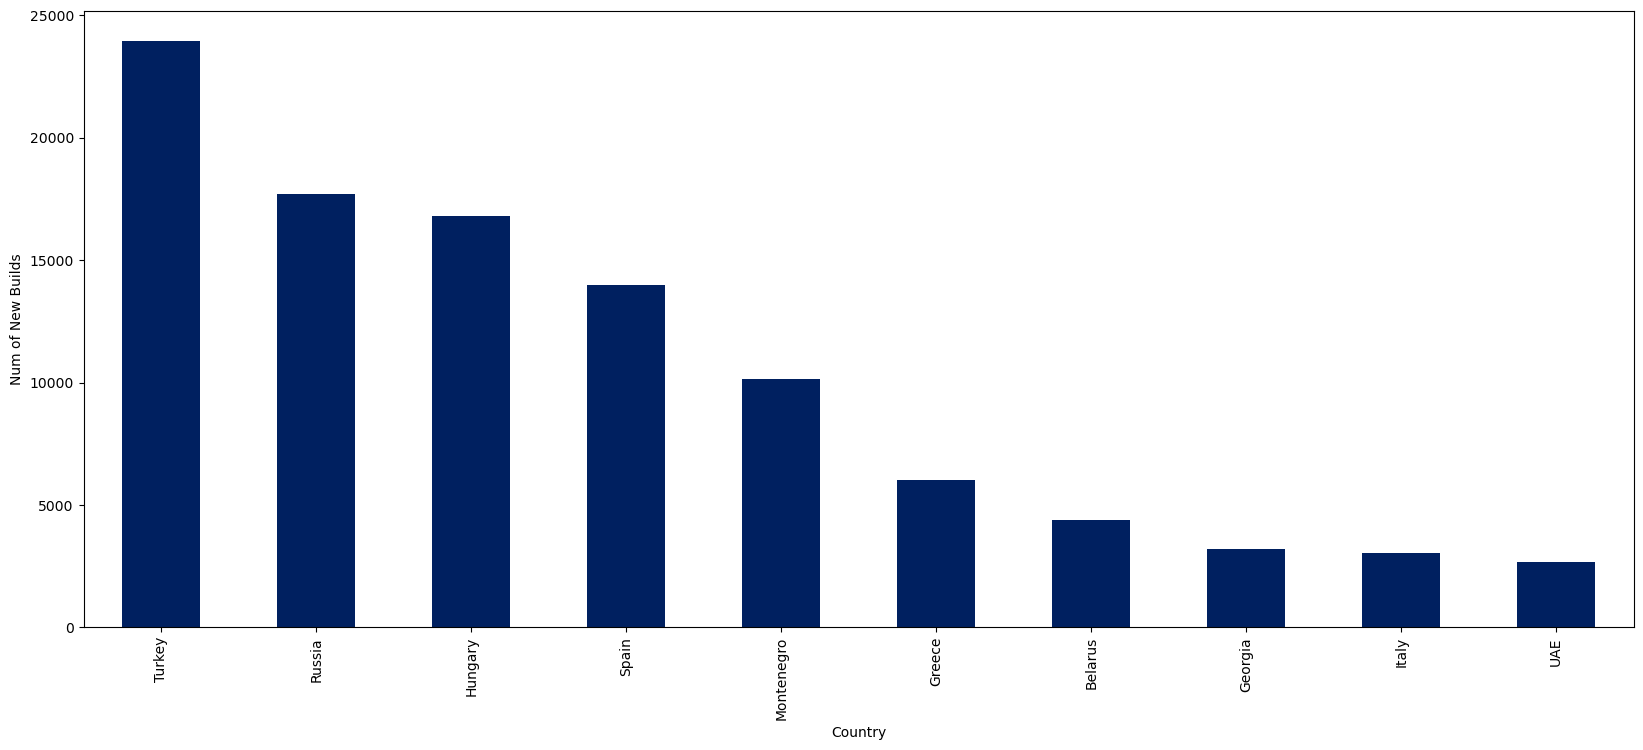

In [170]:
#Markets with high supply of newly built properties (built ≥ 2020)
new_builds = (
    realestate_df[realestate_df['construction_year_fixed'] >= 2020]
    .groupby('country').size()
    .sort_values(ascending=False)
    .head(10)
)

new_builds.plot(kind='bar', xlabel='Country', ylabel='Num of New Builds', figsize=(20,8), color='#002060')

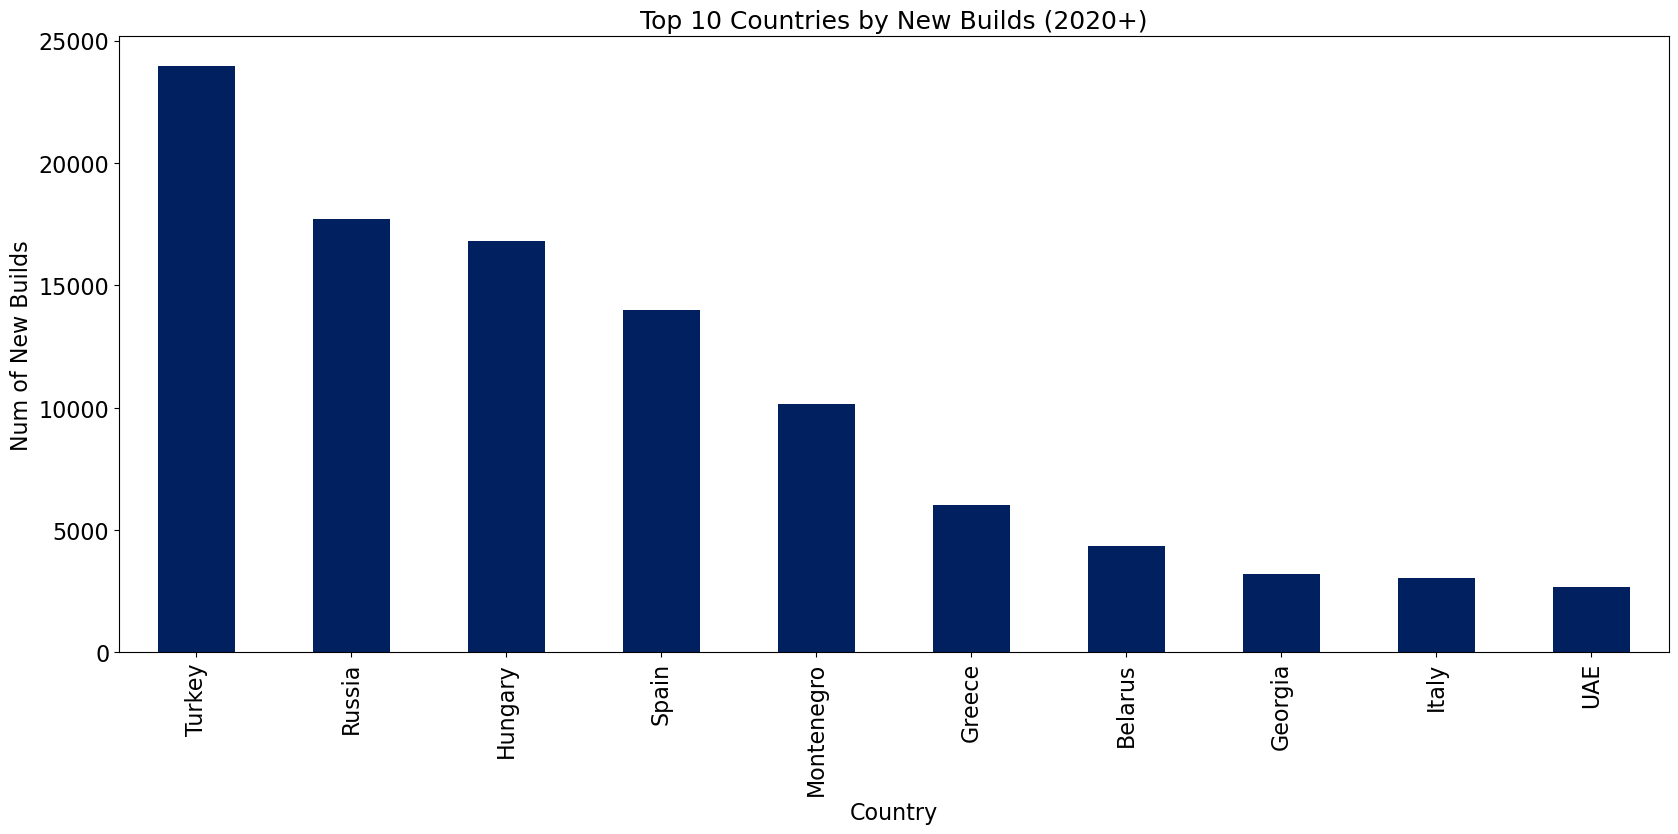

In [180]:
import matplotlib.pyplot as plt

new_builds = (
    realestate_df[realestate_df['construction_year_fixed'] >= 2020]
    .groupby('country').size()
    .sort_values(ascending=False)
    .head(10)
)

# Create the plot
ax = new_builds.plot(
    kind='bar',
    xlabel='Country',
    ylabel='Num of New Builds',
    figsize=(20, 8),
    color='#002060'
)

# Customize font sizes
ax.set_xlabel('Country', fontsize=16)
ax.set_ylabel('Num of New Builds', fontsize=16)
ax.set_title('Top 10 Countries by New Builds (2020+)', fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

Correlation between building age and price: -0.06


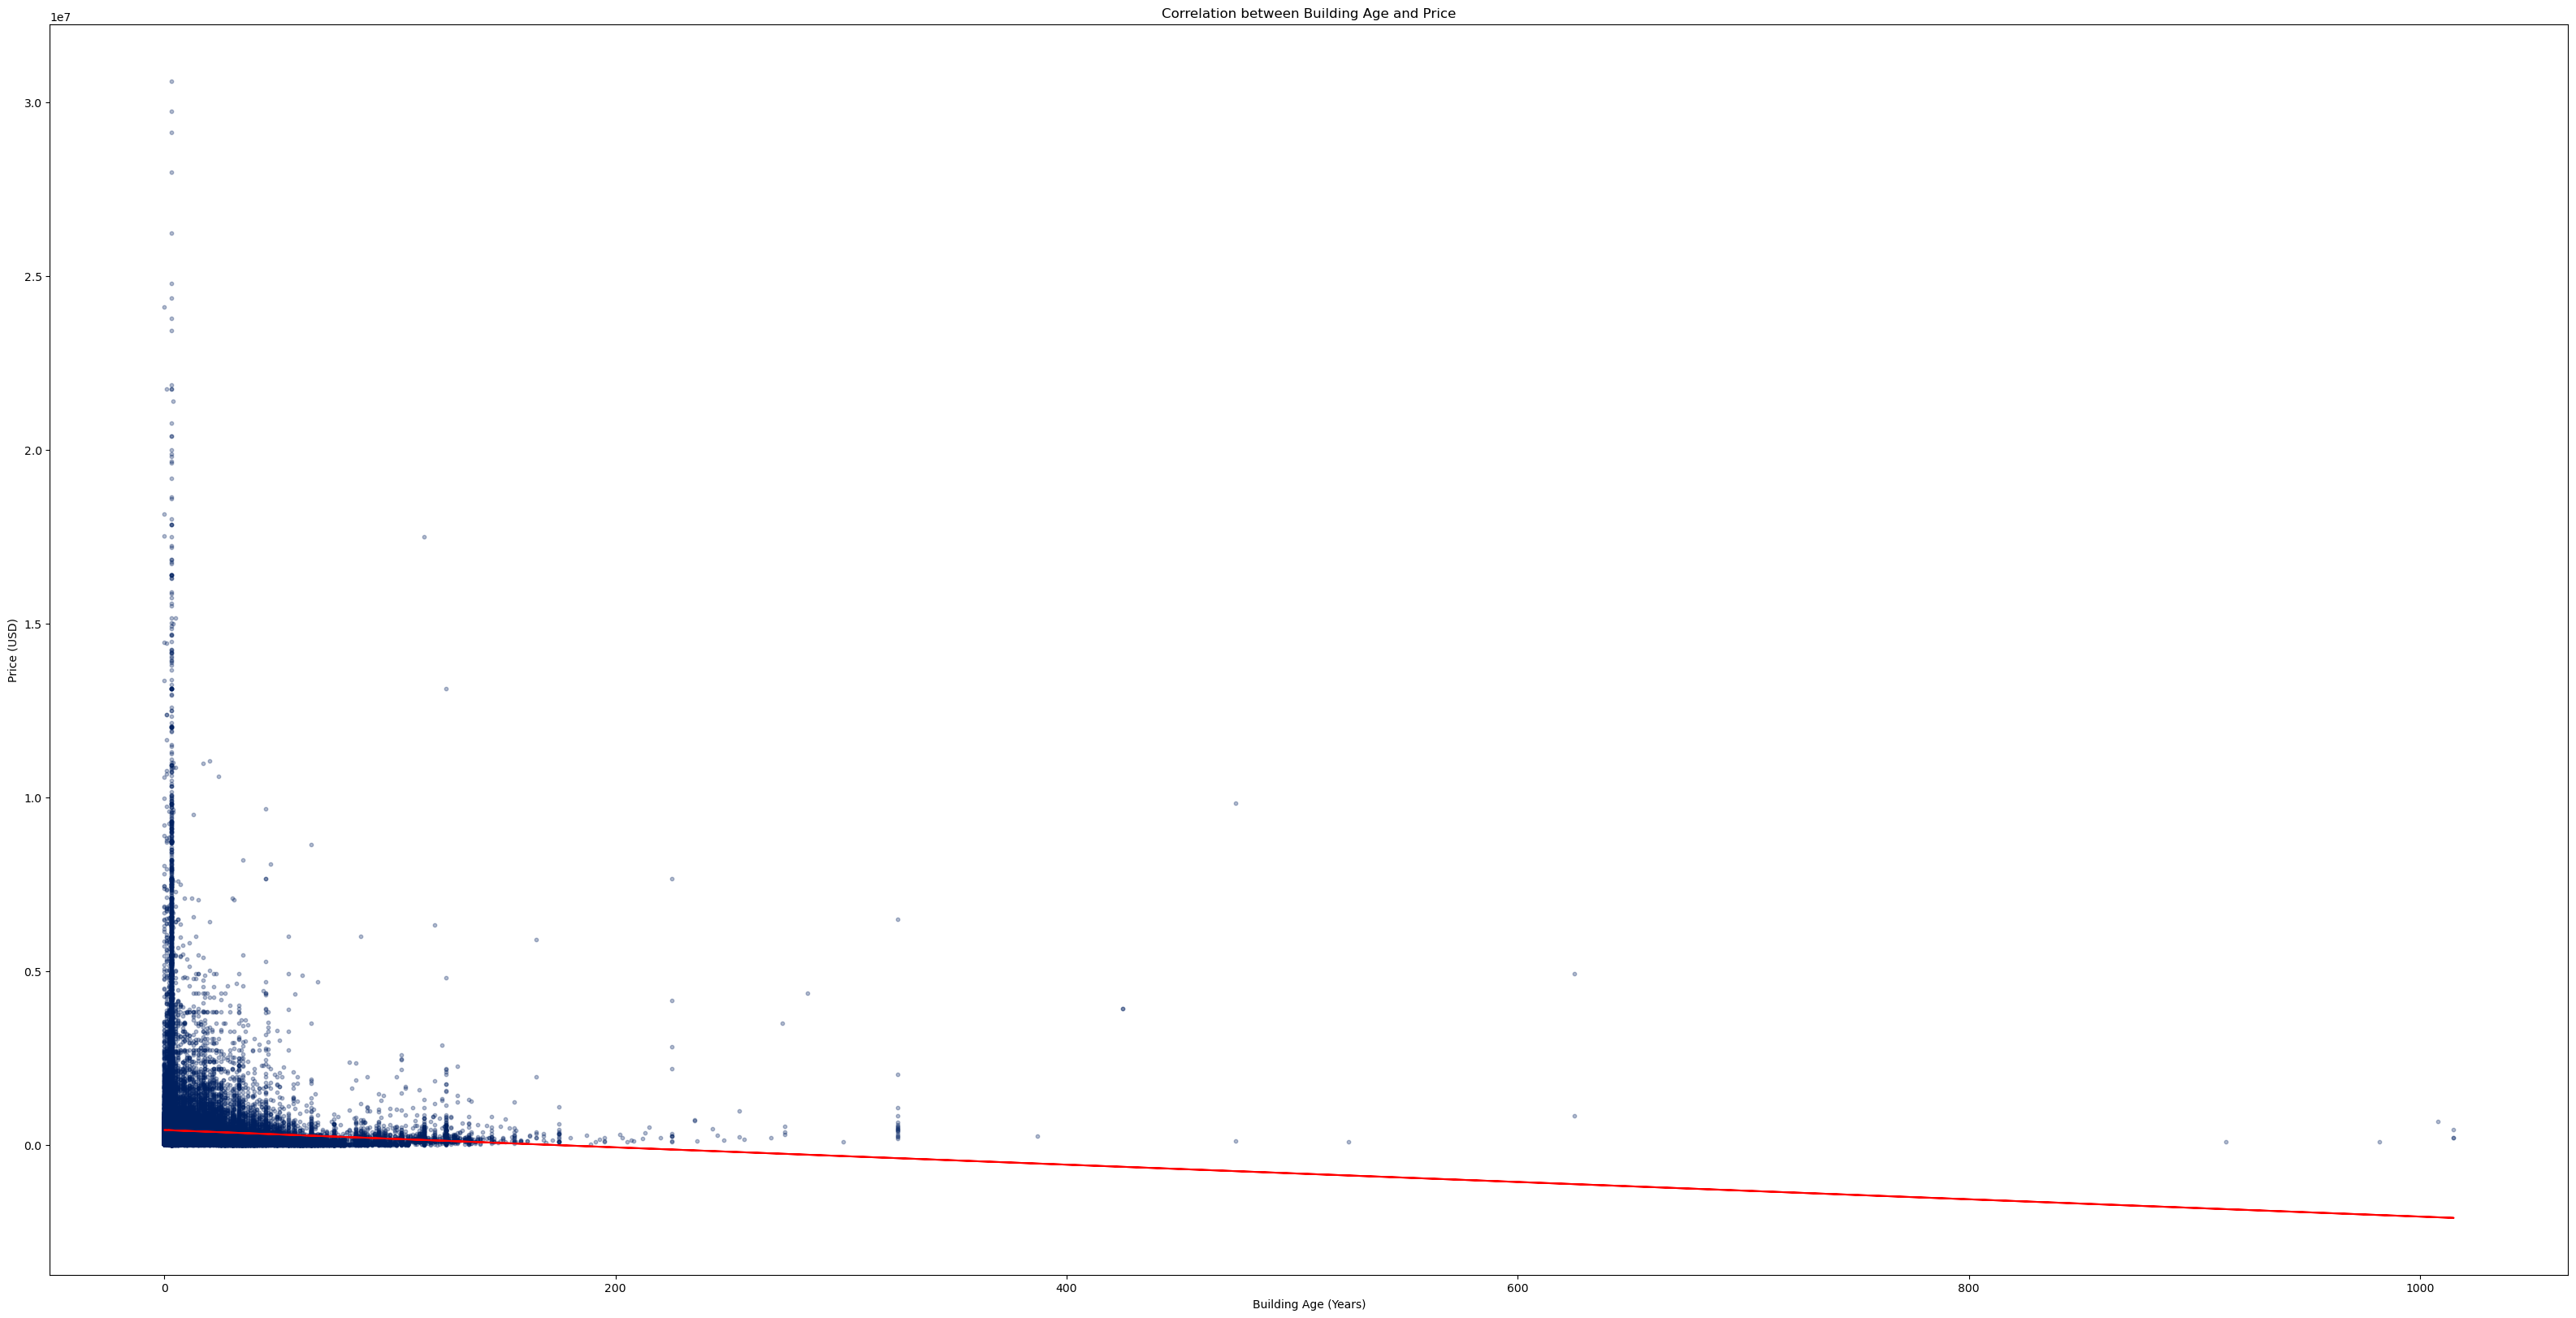

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate building age
realestate_df['building_age'] = 2025 - realestate_df['construction_year_fixed']

# Calculate correlation
corr = realestate_df['building_age'].corr(realestate_df['price_in_USD'])
print(f'Correlation between building age and price: {corr:.2f}')

# Scatter plot
plt.figure(figsize=(40,20))
plt.scatter(realestate_df['building_age'], realestate_df['price_in_USD'], alpha=0.3, color='#002060', s=10)

plt.title('Correlation between Building Age and Price')
plt.xlabel('Building Age (Years)')
plt.ylabel('Price (USD)')

# Add a simple linear trend line
z = np.polyfit(realestate_df['building_age'], realestate_df['price_in_USD'], 1)
p = np.poly1d(z)
plt.plot(realestate_df['building_age'], p(realestate_df['building_age']), color='red')

plt.show()

Correlation between building age and price: -0.06


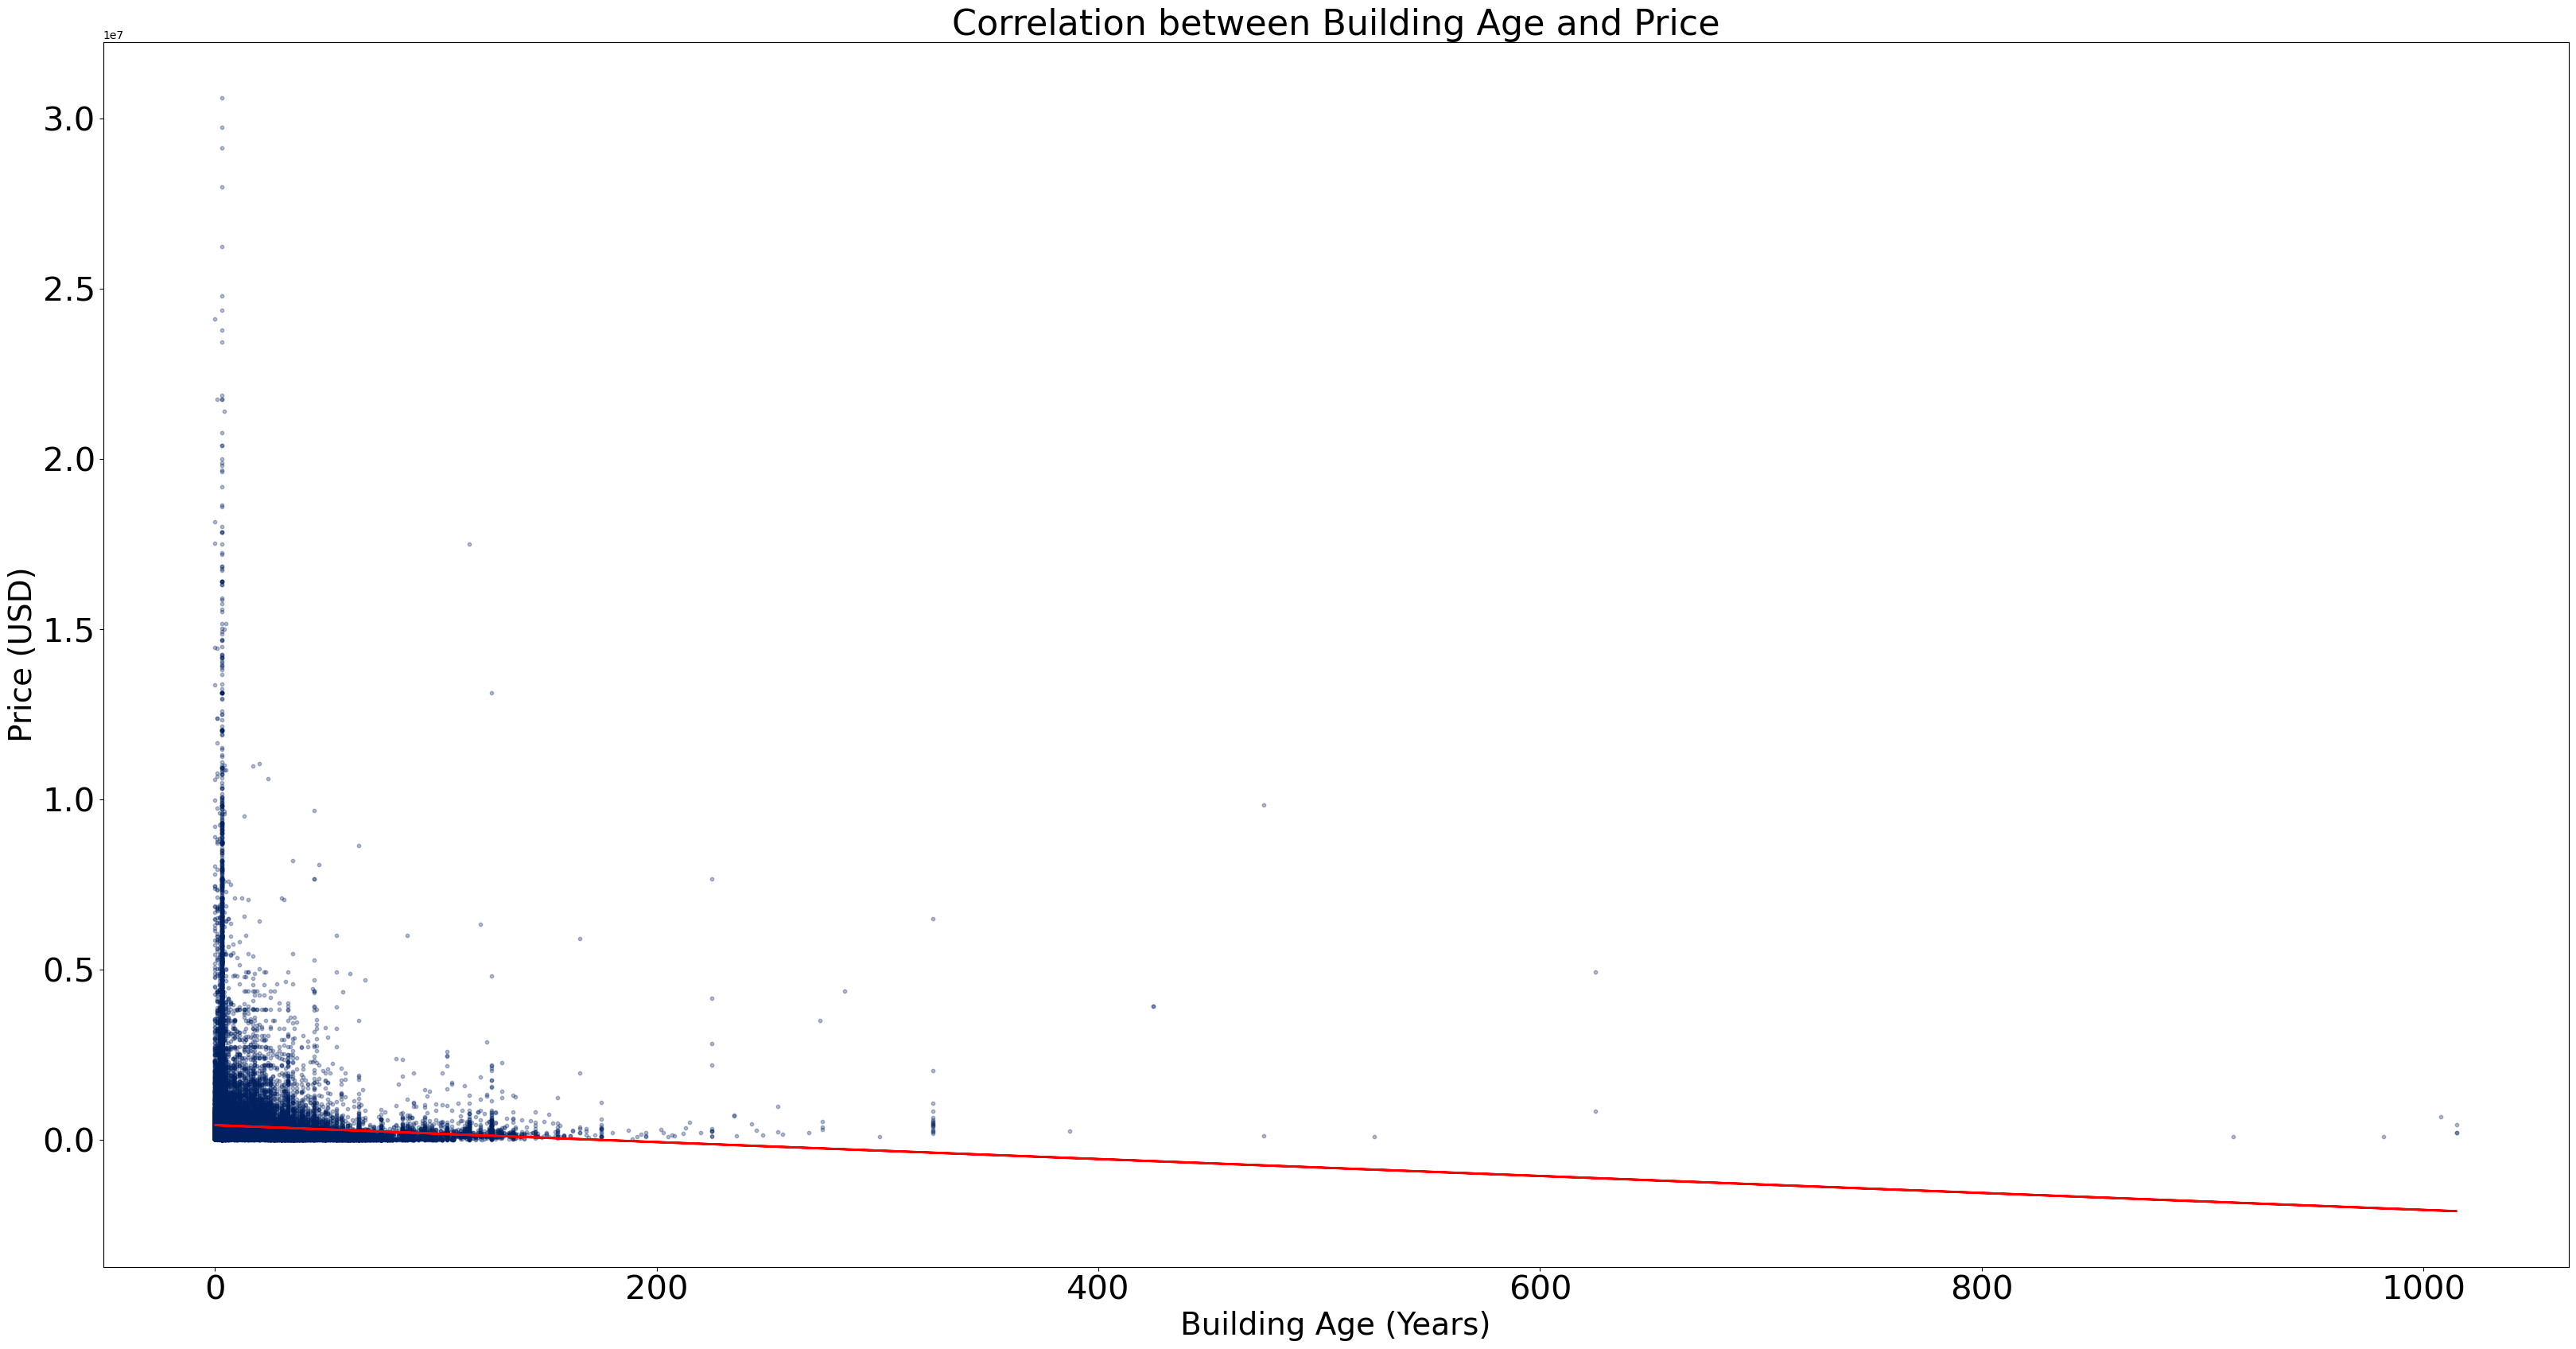

In [182]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate building age
realestate_df['building_age'] = 2025 - realestate_df['construction_year_fixed']

# Calculate correlation
corr = realestate_df['building_age'].corr(realestate_df['price_in_USD'])
print(f'Correlation between building age and price: {corr:.2f}')

# Scatter plot
plt.figure(figsize=(40, 20))
plt.scatter(
    realestate_df['building_age'],
    realestate_df['price_in_USD'],
    alpha=0.3,
    color='#002060',
    s=10
)

# Add title and labels with font size
plt.title('Correlation between Building Age and Price', fontsize=32)
plt.xlabel('Building Age (Years)', fontsize=28)
plt.ylabel('Price (USD)', fontsize=28)

# Customize tick label sizes
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Add a simple linear trend line
z = np.polyfit(realestate_df['building_age'], realestate_df['price_in_USD'], 1)
p = np.poly1d(z)
plt.plot(realestate_df['building_age'], p(realestate_df['building_age']), color='red', linewidth=2)

plt.show()